<a href="https://colab.research.google.com/github/ktatikon/Audit-risk/blob/main/Audit_risk_kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [90]:
import numpy as np
import pandas as pd

In [91]:
from pandas.core.generic import InvalidIndexError
import sklearn
import scipy
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)
%matplotlib inline
import seaborn as sns
import matplotlib.dates as mdates

In [92]:
import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
  for filename in filenames:
    print(os.path.join(dirname, filename))

In [93]:
import pandas as pd

df = pd.read_csv('/content/sample_data/audit_risk.csv', encoding='latin1')
df.head(5)

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,Risk_C,Money_Value,Score_MV,Risk_D,District_Loss,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
0,3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,0.2,1.0,3.38,0.2,0.676,2,0.2,0.4,0,0.2,0.0,2.4,8.574,0.4,0.5,1.7148,1
1,3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,0.2,1.0,0.94,0.2,0.188,2,0.2,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5,0.5108,0
2,3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,0.2,1.0,0.00,0.2,0.000,2,0.2,0.4,0,0.2,0.0,2.0,1.548,0.4,0.5,0.3096,0
3,3.89,8,8.50,0.6,5.100,12.03,0.6,7.218,20.53,5.5,0.4,2.2,7.79,0.4,3.116,2,0.2,0.4,0,0.2,0.0,4.2,18.034,0.4,0.5,3.6068,1
4,3.89,8,8.40,0.6,5.040,11.05,0.6,6.630,19.45,5.5,0.4,2.2,7.34,0.4,2.936,2,0.2,0.4,0,0.2,0.0,4.2,17.206,0.4,0.5,3.4412,1


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 669 entries, 0 to 668
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sector_score    669 non-null    float64
 1   LOCATION_ID     669 non-null    object 
 2   PARA_A          669 non-null    float64
 3   Score_A         669 non-null    float64
 4   Risk_A          669 non-null    float64
 5   PARA_B          669 non-null    float64
 6   Score_B         669 non-null    float64
 7   Risk_B          669 non-null    float64
 8   TOTAL           669 non-null    float64
 9   numbers         669 non-null    float64
 10  Score_B.1       669 non-null    float64
 11  Risk_C          669 non-null    float64
 12  Money_Value     668 non-null    float64
 13  Score_MV        669 non-null    float64
 14  Risk_D          669 non-null    float64
 15  District_Loss   669 non-null    int64  
 16  PROB            669 non-null    float64
 17  RiSk_E          669 non-null    flo

In [95]:
#df['LOCATION_ID'] = df.loc[df['LOHARU']]

In [96]:
for col in df:
  print('coulumn number:', col)
  print(df[col].value_counts())

coulumn number: Sector_score
55.57    185
3.89      89
1.85      77
2.72      73
3.41      69
2.37      61
21.61     41
1.99      35
59.85     30
2.34       5
15.56      3
17.68      1
Name: Sector_score, dtype: int64
coulumn number: LOCATION_ID
8          64
19         58
9          47
16         40
12         38
5          38
2          37
13         33
4          31
6          30
15         29
11         25
22         24
32         21
29         19
14         17
18         15
31         12
1           9
21          8
39          8
37          8
43          7
27          7
28          6
25          5
36          4
30          4
20          4
38          4
3           3
40          2
7           1
LOHARU      1
SAFIDON     1
NUH         1
44          1
23          1
42          1
41          1
35          1
34          1
24          1
17          1
Name: LOCATION_ID, dtype: int64
coulumn number: PARA_A
0.00     127
0.49       8
0.84       7
0.51       7
1.07       6
        ... 
0.81 

In [97]:
df.Risk.value_counts()

0    416
1    253
Name: Risk, dtype: int64

In [98]:
416+253

669

In [99]:
df.shape

(669, 27)

In [100]:
df.nunique().sort_values()

Detection_Risk      1
Risk                2
Prob                3
PROB                3
District_Loss       3
Score_B.1           3
Score_MV            3
Score_A             3
Score_B             3
numbers             5
Risk_C              5
RiSk_E              5
Risk_F              6
History             6
CONTROL_RISK        9
Sector_score       12
Score              17
LOCATION_ID        44
Risk_D            286
Money_Value       286
PARA_B            315
Risk_B            317
PARA_A            331
Risk_A            331
TOTAL             414
Inherent_Risk     509
Audit_Risk        521
dtype: int64

In [101]:
df.dtypes

Sector_score      float64
LOCATION_ID        object
PARA_A            float64
Score_A           float64
Risk_A            float64
PARA_B            float64
Score_B           float64
Risk_B            float64
TOTAL             float64
numbers           float64
Score_B.1         float64
Risk_C            float64
Money_Value       float64
Score_MV          float64
Risk_D            float64
District_Loss       int64
PROB              float64
RiSk_E            float64
History             int64
Prob              float64
Risk_F            float64
Score             float64
Inherent_Risk     float64
CONTROL_RISK      float64
Detection_Risk    float64
Audit_Risk        float64
Risk                int64
dtype: object

In [102]:
df['LOCATION_ID'][295] = 0

df['LOCATION_ID'][295]

0

In [103]:
df['LOCATION_ID'][299] = 0

In [104]:
df['LOCATION_ID'][311] = 0
df['LOCATION_ID'][311]

0

In [105]:
df.isna().sum()

Sector_score      0
LOCATION_ID       0
PARA_A            0
Score_A           0
Risk_A            0
PARA_B            0
Score_B           0
Risk_B            0
TOTAL             0
numbers           0
Score_B.1         0
Risk_C            0
Money_Value       1
Score_MV          0
Risk_D            0
District_Loss     0
PROB              0
RiSk_E            0
History           0
Prob              0
Risk_F            0
Score             0
Inherent_Risk     0
CONTROL_RISK      0
Detection_Risk    0
Audit_Risk        0
Risk              0
dtype: int64

In [106]:
percent_missing = df.isnull().sum() * 100/ len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})

missing_value_df.sort_values('percent_missing', inplace= True)
print(missing_value_df)

                   column_name  percent_missing
Sector_score      Sector_score         0.000000
Detection_Risk  Detection_Risk         0.000000
CONTROL_RISK      CONTROL_RISK         0.000000
Inherent_Risk    Inherent_Risk         0.000000
Score                    Score         0.000000
Risk_F                  Risk_F         0.000000
Prob                      Prob         0.000000
History                History         0.000000
RiSk_E                  RiSk_E         0.000000
PROB                      PROB         0.000000
District_Loss    District_Loss         0.000000
Risk_D                  Risk_D         0.000000
Audit_Risk          Audit_Risk         0.000000
Score_MV              Score_MV         0.000000
Risk_C                  Risk_C         0.000000
Score_B.1            Score_B.1         0.000000
numbers                numbers         0.000000
TOTAL                    TOTAL         0.000000
Risk_B                  Risk_B         0.000000
Score_B                Score_B         0

In [107]:
df['LOCATION_ID'] = df['LOCATION_ID'].astype('int')

In [108]:
df.nunique().sort_values()

Detection_Risk      1
Risk                2
Prob                3
PROB                3
District_Loss       3
Score_B.1           3
Score_MV            3
Score_A             3
Score_B             3
numbers             5
Risk_C              5
RiSk_E              5
Risk_F              6
History             6
CONTROL_RISK        9
Sector_score       12
Score              17
LOCATION_ID        42
Risk_D            286
Money_Value       286
PARA_B            315
Risk_B            317
PARA_A            331
Risk_A            331
TOTAL             414
Inherent_Risk     509
Audit_Risk        521
dtype: int64

In [109]:
df.isna().sum()

Sector_score      0
LOCATION_ID       0
PARA_A            0
Score_A           0
Risk_A            0
PARA_B            0
Score_B           0
Risk_B            0
TOTAL             0
numbers           0
Score_B.1         0
Risk_C            0
Money_Value       1
Score_MV          0
Risk_D            0
District_Loss     0
PROB              0
RiSk_E            0
History           0
Prob              0
Risk_F            0
Score             0
Inherent_Risk     0
CONTROL_RISK      0
Detection_Risk    0
Audit_Risk        0
Risk              0
dtype: int64

In [110]:
df1 = df.dropna()

In [111]:
df1.dtypes

Sector_score      float64
LOCATION_ID         int64
PARA_A            float64
Score_A           float64
Risk_A            float64
PARA_B            float64
Score_B           float64
Risk_B            float64
TOTAL             float64
numbers           float64
Score_B.1         float64
Risk_C            float64
Money_Value       float64
Score_MV          float64
Risk_D            float64
District_Loss       int64
PROB              float64
RiSk_E            float64
History             int64
Prob              float64
Risk_F            float64
Score             float64
Inherent_Risk     float64
CONTROL_RISK      float64
Detection_Risk    float64
Audit_Risk        float64
Risk                int64
dtype: object

In [112]:
df1.isna().sum()

Sector_score      0
LOCATION_ID       0
PARA_A            0
Score_A           0
Risk_A            0
PARA_B            0
Score_B           0
Risk_B            0
TOTAL             0
numbers           0
Score_B.1         0
Risk_C            0
Money_Value       0
Score_MV          0
Risk_D            0
District_Loss     0
PROB              0
RiSk_E            0
History           0
Prob              0
Risk_F            0
Score             0
Inherent_Risk     0
CONTROL_RISK      0
Detection_Risk    0
Audit_Risk        0
Risk              0
dtype: int64

In [113]:
#df['Money_Value'] = df['Money_Value'].fillna(df['Money_Value']).mode().iloc[0]

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 669 entries, 0 to 668
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sector_score    669 non-null    float64
 1   LOCATION_ID     669 non-null    int64  
 2   PARA_A          669 non-null    float64
 3   Score_A         669 non-null    float64
 4   Risk_A          669 non-null    float64
 5   PARA_B          669 non-null    float64
 6   Score_B         669 non-null    float64
 7   Risk_B          669 non-null    float64
 8   TOTAL           669 non-null    float64
 9   numbers         669 non-null    float64
 10  Score_B.1       669 non-null    float64
 11  Risk_C          669 non-null    float64
 12  Money_Value     668 non-null    float64
 13  Score_MV        669 non-null    float64
 14  Risk_D          669 non-null    float64
 15  District_Loss   669 non-null    int64  
 16  PROB            669 non-null    float64
 17  RiSk_E          669 non-null    flo

In [116]:
#df1[LOCATION_ID] = df1[LOCATION_ID].astype('int')

In [117]:
#import pandas as pd

# Read the dataset
#df = pd.read_csv('your_dataset.csv')  # Replace 'your_dataset.csv' with the actual filename/path

# Iterate through each column
for column in df.columns:
    if df[column].dtype == 'object':
        # Find unique object values in the column
        unique_objects = df['LOCATION_ID'].unique()
        
        # Create a mapping dictionary for object-to-integer conversion
        mapping = {obj: i for i, obj in enumerate(unique_objects)}
        
        # Replace object values with integers
        df1 =df['LOCATION_ID'] = df['LOCATION_ID'].map(mapping).astype(int)

# Save the modified dataset
df.to_csv('modified_audit_risk.csv', index=False)  # Replace 'modified_dataset.csv' with the desired filename



In [118]:
from sklearn import metrics
from sklearn import preprocessing
import seaborn as sns
from scipy.stats import norm
from scipy.stats import kurtosis
from scipy.stats import skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
import os

In [119]:
df.dtypes

Sector_score      float64
LOCATION_ID         int64
PARA_A            float64
Score_A           float64
Risk_A            float64
PARA_B            float64
Score_B           float64
Risk_B            float64
TOTAL             float64
numbers           float64
Score_B.1         float64
Risk_C            float64
Money_Value       float64
Score_MV          float64
Risk_D            float64
District_Loss       int64
PROB              float64
RiSk_E            float64
History             int64
Prob              float64
Risk_F            float64
Score             float64
Inherent_Risk     float64
CONTROL_RISK      float64
Detection_Risk    float64
Audit_Risk        float64
Risk                int64
dtype: object

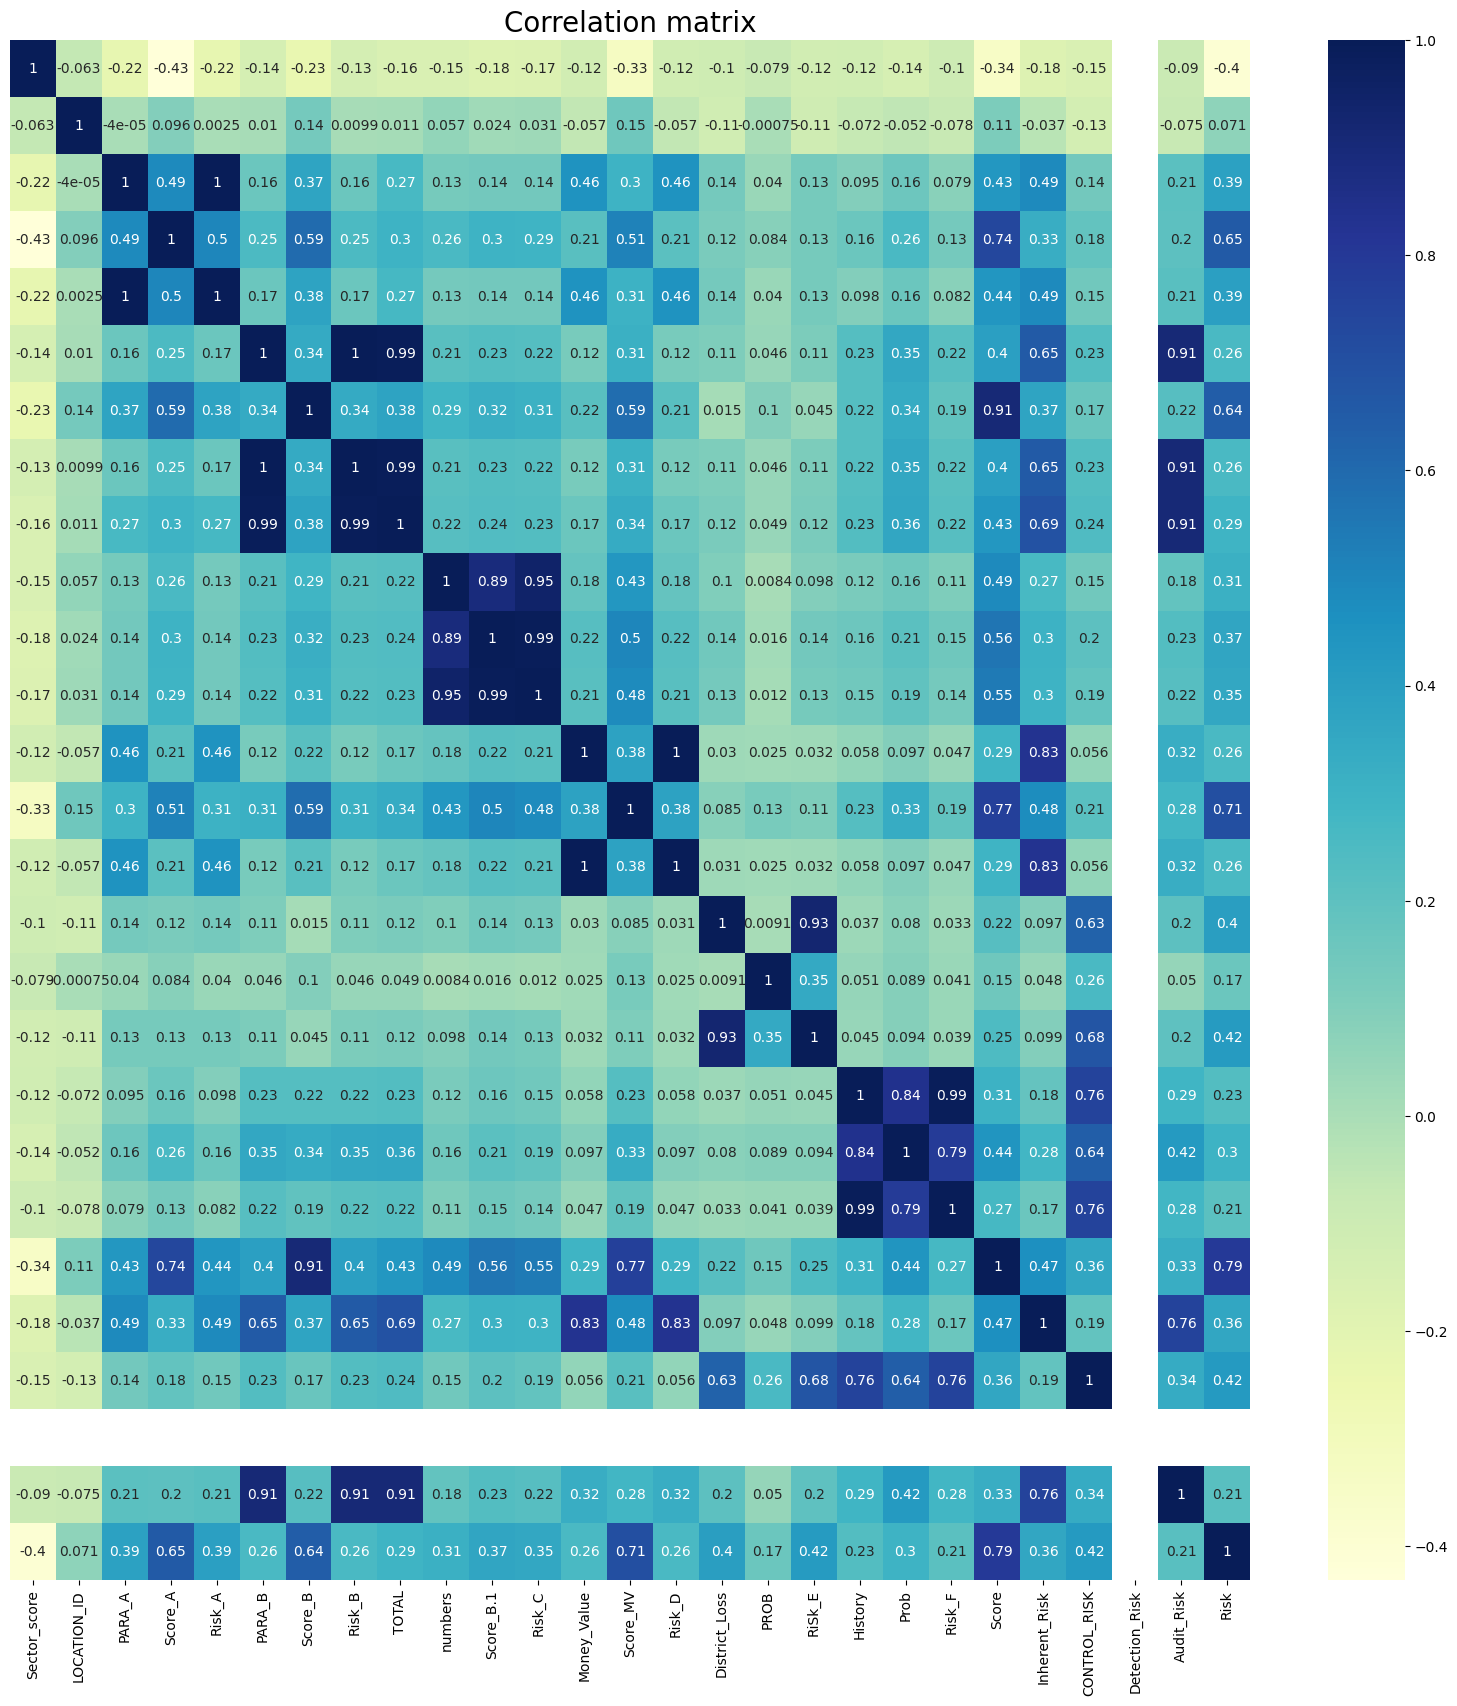

In [120]:
f, ax = plt.subplots(figsize = [20, 20])
sns.heatmap(df.corr(),
            annot = True,
            ax = ax,
            yticklabels= False,
            cmap = 'YlGnBu')
ax.set_title('Correlation matrix',
          fontsize = 20)
plt.show()

In [121]:
df.Risk.value_counts()

0    416
1    253
Name: Risk, dtype: int64

In [122]:
df['LOCATION_ID'][295]

0

In [123]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

df['LOCATION_ID'] = le.fit_transform(df['LOCATION_ID'])

In [124]:
df.dtypes

Sector_score      float64
LOCATION_ID         int64
PARA_A            float64
Score_A           float64
Risk_A            float64
PARA_B            float64
Score_B           float64
Risk_B            float64
TOTAL             float64
numbers           float64
Score_B.1         float64
Risk_C            float64
Money_Value       float64
Score_MV          float64
Risk_D            float64
District_Loss       int64
PROB              float64
RiSk_E            float64
History             int64
Prob              float64
Risk_F            float64
Score             float64
Inherent_Risk     float64
CONTROL_RISK      float64
Detection_Risk    float64
Audit_Risk        float64
Risk                int64
dtype: object

In [148]:
import numpy as np
from sklearn.model_selection import train_test_split

X = df.drop(['Risk'], axis = 1)

y = df['Risk']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 42)

In [149]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

useless = []

cat_features = X_train.columns[X_train.dtypes == 'object']
cat_features = cat_features.difference(useless) # remove useless columns from cat_stuff

cat_features= cat_features.tolist()

num_features = X_train.columns.difference(useless).difference(cat_features)

num_features = num_features.tolist()

num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy = 'mean')),
    ('std', StandardScaler())
])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy= 'most_frequent'))
])

core_pipeline = ColumnTransformer([
    ('cat', cat_pipeline, cat_features),
    ('num', num_pipeline, num_features)
])

full_pipeline = Pipeline([
    ('core_pipeline', core_pipeline)
])

In [150]:
X_train = full_pipeline.fit_transform(X_train)
X_test = full_pipeline.fit_transform(X_test)

###Using LinearSVC

In [151]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import LinearSVC
from numpy.random import uniform
import warnings

warnings.filterwarnings('ignore')

model = LinearSVC(random_state = 42)
model.get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'loss', 'max_iter', 'multi_class', 'penalty', 'random_state', 'tol', 'verbose'])

In [158]:
param_distributions = {
    'penalty': ['l1', 'l2'],
    'C': uniform(0.01, 1.0, size = 50)
}

random_search = RandomizedSearchCV(model, 
                                   param_distributions, 
                                   cv = 5, 
                                   scoring = 'f1_weighted',
                                   return_train_score = True,
                                   n_iter=20)

best_m1 = random_search.fit(X_train, y_train)

print(random_search.best_params_)




{'penalty': 'l2', 'C': 0.9973267588236723}


In [159]:
best_model = random_search.best_estimator_
best_model_LinearSVC = random_search.best_estimator_
best_model.fit(X_train, y_train)

y_pred_LinearSVC = best_model.predict(X_test)

In [160]:
print(y_pred_LinearSVC)

[0 1 0 0 0 1 0 1 0 1 1 0 1 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1
 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 1 1 0 0 0 0
 1 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0
 1 0 0 0 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1]


In [161]:
from sklearn.metrics import precision_score, recall_score, f1_score

def scores(y_test1, y_pred1):
  precision = precision_score(y_test1, y_pred1, average ='weighted')
  recall = recall_score(y_test1, y_pred1, average = 'weighted')
  f1 = f1_score(y_test1, y_pred1, average = 'weighted')

  report  = (f"precision: {precision:.5f}\n"
              f"Recall: {recall:.5f}\n"
              f"F1 score:{f1:.5f}\n")
  print(report)

scores(y_test, y_pred_LinearSVC)

precision: 0.95828
Recall: 0.95522
F1 score:0.95464



###Using Extra TreesClassifier

In [162]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier(random_state = 42)

param_distributions = {
    "criterion": ['gini', 'entropy'],
    "n_estimators": [50, 100, 200, 400, 800]
}

random_search = RandomizedSearchCV(model,
                                   param_distributions,
                                   cv = 5,
                                   scoring = 'f1_weighted',
                                   return_train_score = True,
                                   n_iter = 20)

random_search.fit(X_train, y_train)
best_model = random_search.best_estimator_
best_model_ETC = random_search.best_estimator_
best_model.fit(X_train, y_train)

y_pred_ETC = best_model.predict(X_test)

scores(y_test, y_pred_ETC)



precision: 0.94289
Recall: 0.94030
F1 score:0.93952



###Using SVC

In [163]:
from sklearn.svm import SVC

model = SVC(random_state = 42)

param_distributions = {
    'C': np.random.uniform(0.01, 1.0, 5)
}

random_search = RandomizedSearchCV(model,
                                   param_distributions,
                                   cv = 5,
                                   scoring = 'f1_weighted',
                                  return_train_score = True,
                                  n_iter = 20,
                                   )

random_search.fit(X_train, y_train)
best_model = random_search.best_estimator_
best_model_SVC = random_search.best_estimator_

best_model.fit(X_train, y_train)

y_pred_SVC = best_model.predict(X_test)

scores(y_test, y_pred_SVC)
                                

precision: 0.98543
Recall: 0.98507
F1 score:0.98502



###Using voting Classifier with the Three above

In [165]:
from sklearn.ensemble import VotingClassifier

estimator = [('ETC', best_model_ETC),
             ('SVC', best_model_SVC),
             ('LinearSVC', best_model_LinearSVC)]

#Voting classifier with hard voting

vot_hard = VotingClassifier(estimators = estimator, voting = 'hard')

vot_hard.fit(X_train, y_train)

y_pred_vc = vot_hard.predict(X_test)

scores(y_test, y_pred_vc)

precision: 0.97840
Recall: 0.97761
F1 score:0.97748

